<a href="https://colab.research.google.com/github/AnastasiaV703/Business_Analytics_Portfolio/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/Sample - Superstore.csv')
df.drop(columns = ['Row ID'])

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State/Province,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,US-2021-103800,03-01-2021,07-01-2021,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,US-2021-112326,04-01-2021,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,US-2021-112326,04-01-2021,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,US-2021-112326,04-01-2021,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,US-2021-141817,05-01-2021,12-01-2021,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,US-2024-143259,30-12-2024,03-01-2025,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
10190,US-2024-115427,30-12-2024,03-01-2025,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
10191,US-2024-156720,30-12-2024,03-01-2025,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
10192,US-2024-143259,30-12-2024,03-01-2025,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279


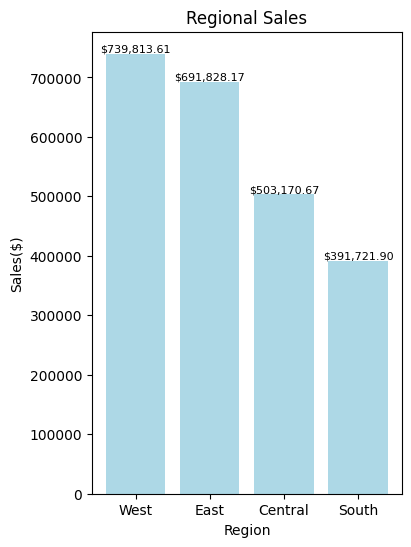

In [ ]:
# Exploratory Analysis to get sales overview by regions/states/top & bottom selling categories.

df['Sales'] = pd.to_numeric(df['Sales'], errors = 'coerce')
regional_sales = df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
regional_sales['Sales'] = regional_sales['Sales'].round(2)
plt.figure(figsize=(4,6))
bars = plt.bar(regional_sales['Region'], regional_sales['Sales'], color = 'lightblue')
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height,
           f"${height:,.2f}", ha='center', va='bottom', fontsize = 8)
plt.title('Regional Sales')
plt.xlabel('Region')
plt.ylabel('Sales($)')
plt.show()

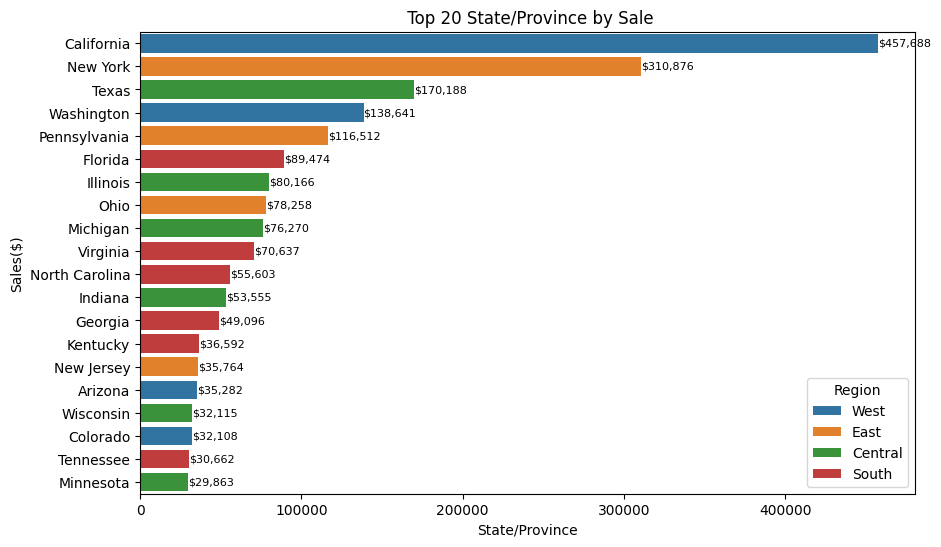

In [ ]:
sales_by_states = df.groupby(['Region','State/Province'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
top_states = sales_by_states.head(20)
plt.figure(figsize=(10,6))
sns.barplot(data=top_states, x='Sales', y='State/Province', hue='Region', dodge=False)
for index, value in enumerate(top_states['Sales']):
  plt.text(value, index, f"${value:,.0f}", va='center', ha = 'left', fontsize = 8)
plt.title(' Top 20 State/Province by Sale')
plt.xlabel('State/Province')
plt.ylabel('Sales($)')
plt.show()

In [ ]:
top_products = df.groupby(['Sub-Category','Product Name'])['Sales'].sum().reset_index().sort_values(by="Sales", ascending = False)
top_products.head(10)

,Sub-Category,Product Name,Sales
757,Copiers,Canon imageCLASS 2200 Advanced Copier,61599.824
483,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
1110,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480
702,Chairs,HON 5400 Series Task Chairs for Big and Tall,21870.576
495,Binders,GBC DocuBind TL300 Electric Binding System,19823.479
497,Binders,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
760,Copiers,Hewlett Packard LaserJet 3310 Copier,18839.686
1118,Machines,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
492,Binders,GBC DocuBind P400 Electric Binding System,17965.068
1783,Supplies,High Speed Automatic Electric Letter Opener,17030.312


In [ ]:
bottom_products = top_products.tail(10)
bottom_products

,Sub-Category,Product Name,Sales
317,Art,Newell 308,8.400
836,Fasteners,Stockwell Gold Paper Clips,8.096
245,Art,4009 Highlighters,8.040
1382,Paper,Xerox 1989,7.968
250,Art,Avery Hi-Liter Comfort Grip Fluorescent Highli...,7.800
254,Art,Avery Hi-Liter Pen Style Six-Color Fluorescent...,7.700
780,Envelopes,Grip Seal Envelopes,7.072
1395,Paper,Xerox 20,6.480
1058,Labels,Avery 5,5.760
185,Appliances,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624


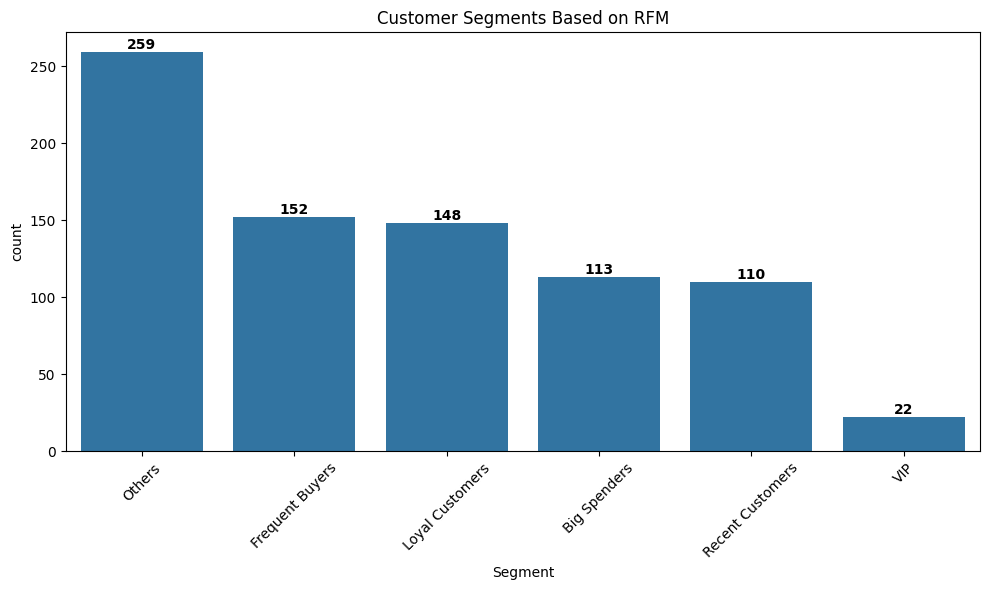

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
current_date = df['Order Date'].max() + pd.Timedelta(days=1)  # Reference point for recency
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (current_date - x.max()).days,  # Recency
    'Order ID': 'nunique',                                  # Frequency
    'Sales': 'sum'                                          # Monetary
}).reset_index()

rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
def segment_customer(row):
    if row['RFM_Score'] == '555':
        return 'VIP'
    elif row['R'] >= 4 and row['F'] >= 4:
        return 'Loyal Customers'
    elif row['F'] >= 4:
        return 'Frequent Buyers'
    elif row['M'] >= 4:
        return 'Big Spenders'
    elif row['R'] >= 4:
        return 'Recent Customers'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.title('Customer Segments Based on RFM')
plt.xticks(rotation=45)

# Add count labels on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [23]:
# Customers within each segment by Monetary value (descending)
top_customers_by_segment = (
    rfm.sort_values(['Segment', 'Monetary'], ascending=[True, False])
       .groupby('Segment')
       .head()
       .sort_values(['Segment', 'Monetary'], ascending=[True, False])
)

top_customers_by_segment[['Customer ID', 'Segment', 'Monetary']]


,Customer ID,Segment,Monetary
711,SM-20320,Big Spenders,25043.0500
752,TC-20980,Big Spenders,19052.2180
632,RB-19360,Big Spenders,15117.3390
741,TA-21385,Big Spenders,14595.6200
328,HL-15040,Big Spenders,12873.2980
680,SC-20095,Frequent Buyers,14142.3340
731,SV-20365,Frequent Buyers,11470.9500
147,CJ-12010,Frequent Buyers,11164.9740
153,CL-12565,Frequent Buyers,10880.5460
436,KF-16285,Frequent Buyers,10604.2660


In [14]:
# Sales, Profit and Discount overview

print(df[['Discount', 'Sales', 'Profit']].describe())

           Discount         Sales        Profit
count  10194.000000  10194.000000  10194.000000
mean       0.155385    228.225854     28.673417
std        0.206249    619.906839    232.465115
min        0.000000      0.444000  -6599.978000
25%        0.000000     17.220000      1.760800
50%        0.200000     53.910000      8.690000
75%        0.200000    209.500000     29.297925
max        0.800000  22638.480000   8399.976000


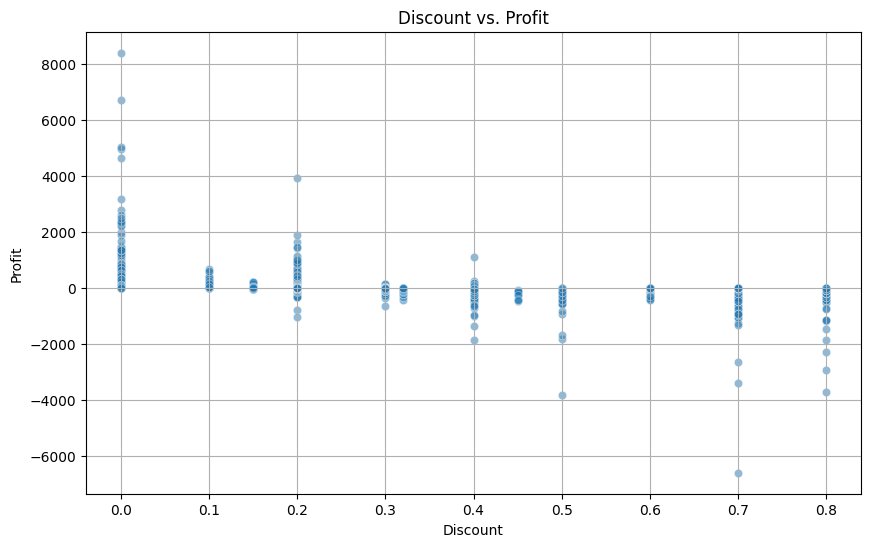

In [15]:
# Analysis to examine how discount impacts key business metrics.
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x='Discount', y="Profit", alpha=0.5)
plt.title('Discount vs. Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid()
plt.show()

#Profit drops when discount > 20%

In [16]:
# Created discount buckets to get sales and profit associated with it. Buckets with discounts "0-10%" and "10-20%" drive higher volume sales and maintain profitability. Discounts over 20% lead to losses.

df['Discount_Bucket'] = pd.cut(df['Discount'], bins = [-0.01,0.1,0.2, 0.3, 0.4, 0.5, 1],
                               labels=['0-10%', '10-20%','20-30%','30-40%', '40-50%', '50%+'])
discount_analysis = df.groupby('Discount_Bucket').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Avg_Profit_Per_Sale=('Profit', 'mean'),
    Count=('Profit', 'count')
).reset_index()
print(discount_analysis)

  Discount_Bucket   Total_Sales  Total_Profit  Avg_Profit_Per_Sale  Count
0           0-10%  1.160276e+06   335818.5572            66.882804   5021
1          10-20%  8.014979e+05    92498.9432            24.613875   3758
2          20-30%  1.044741e+05   -10513.4456           -45.710633    230
3          30-40%  1.309912e+05   -25477.5119          -108.878256    234
4          40-50%  6.440351e+04   -22999.5392          -298.695314     77
5            50%+  6.489135e+04   -77030.1891           -88.135228    874


<ipython-input-16-093875612a5d>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = df.groupby('Discount_Bucket').agg(


In [17]:
import statsmodels.api as sm
import numpy as np

# Linear Regression Analysis aimed to understand the relationship between discounts, sales and quantity sold.

df_LR=df[['Sales','Discount','Quantity','Category', 'Sub-Category','Profit']]
df_LR = df_LR[df_LR['Sales'] > 0]
x=df[['Discount', 'Quantity']]
x=sm.add_constant(x)
y=np.log(df_LR['Sales'])
model=sm.OLS(y,x).fit()
print(model.summary())

# Sales revenue drops if we overuse discounts: small discounts boost sales, and bigger discounts reduce total revenue.
# Quanity has positive effect - higher selling volume helps sales

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     764.8
Date:                Mon, 12 May 2025   Prob (F-statistic):          3.39e-310
Time:                        16:45:03   Log-Likelihood:                -18801.
No. Observations:               10194   AIC:                         3.761e+04
Df Residuals:                   10191   BIC:                         3.763e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3970      0.032    106.299      0.0

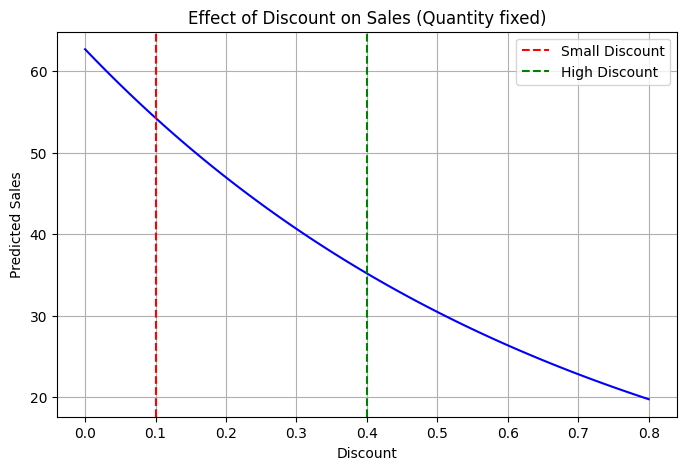

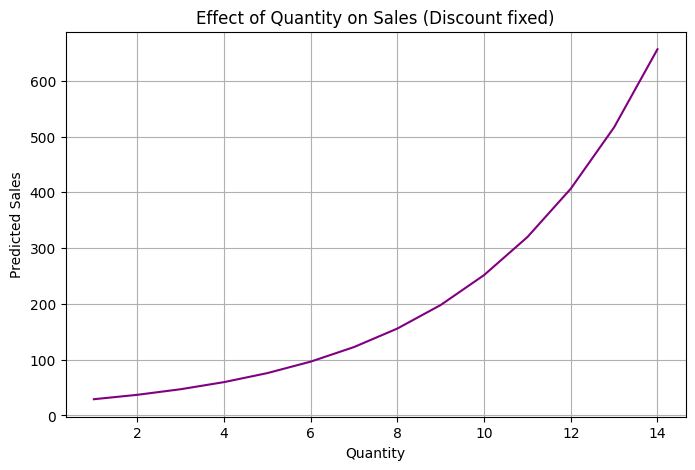

In [29]:
# Effect of Discount (keeping Quantity constant)
quantity_median = df['Quantity'].median()
discount_vals = np.linspace(df['Discount'].min(), df['Discount'].max(), 100)
X_discount = pd.DataFrame({'const': 1, 'Discount': discount_vals, 'Quantity': quantity_median})
log_sales_discount = model.predict(X_discount)
sales_discount = np.exp(log_sales_discount)

plt.figure(figsize=(8,5))
plt.plot(discount_vals, sales_discount, color='blue')
plt.xlabel('Discount')
plt.ylabel('Predicted Sales')
plt.title('Effect of Discount on Sales (Quantity fixed)')
plt.axvline(0.1, color='red', linestyle='--', label='Small Discount')
plt.axvline(0.4, color='green', linestyle='--', label='High Discount')
plt.grid()
plt.legend()
plt.show()

# Effect of Quantity (keeping Discount constant)
discount_median = df['Discount'].median()
quantity_vals = np.arange(int(df['Quantity'].min()), int(df['Quantity'].max()) + 1)
X_quantity = pd.DataFrame({'const': 1, 'Discount': discount_median, 'Quantity': quantity_vals})
log_sales_quantity = model.predict(X_quantity)
sales_quantity = np.exp(log_sales_quantity)

plt.figure(figsize=(8,5))
plt.plot(quantity_vals, sales_quantity, color='purple')
plt.xlabel('Quantity')
plt.ylabel('Predicted Sales')
plt.title('Effect of Quantity on Sales (Discount fixed)')
plt.grid()
plt.show()


In [18]:
segments = df['Segment'].unique()
results = {}
for seg in segments:
    df_seg = df[df['Segment'] == seg]
    X = df_seg[['Discount', 'Quantity']]
    X = sm.add_constant(X)
    y = np.log(df_seg['Sales'])
    model = sm.OLS(y, X).fit()
    results[seg] = model
    print(f"Segment: {seg}")
    print(model.summary())
    print("\n\n")

# Corporate and Consumer segments are most sensitive to discounting - an increase in discounting leads to a major drop in % Sales.
# Home Office segment is more tolerant and can be offered discounts to drive volume.

Segment: Consumer
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     384.7
Date:                Mon, 12 May 2025   Prob (F-statistic):          1.09e-156
Time:                        16:45:29   Log-Likelihood:                -9713.5
No. Observations:                5281   AIC:                         1.943e+04
Df Residuals:                    5278   BIC:                         1.945e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4081      0.045  

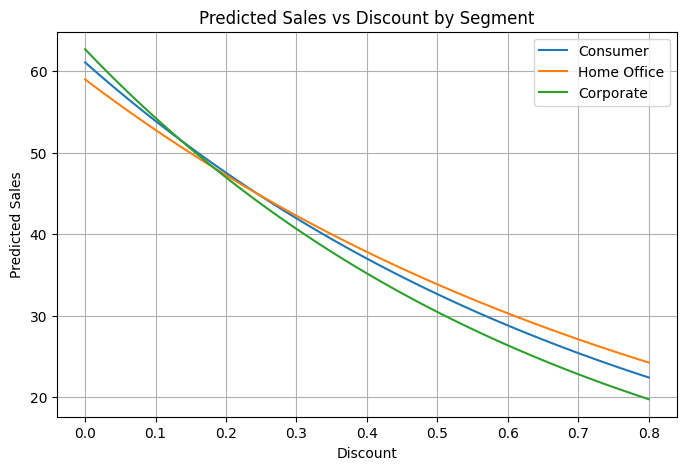

In [32]:
import numpy as np

discount_vals = np.linspace(df['Discount'].min(), df['Discount'].max(), 100)
quantity_fixed = df['Quantity'].median()

plt.figure(figsize=(8,5))

for seg, model in results.items():
    X_pred = pd.DataFrame({
        'const': 1,
        'Discount': discount_vals,
        'Quantity': quantity_fixed
    })
    log_sales_pred = model.predict(X_pred)
    sales_pred = np.exp(log_sales_pred)
    plt.plot(discount_vals, sales_pred, label=seg)

plt.title('Predicted Sales vs Discount by Segment')
plt.xlabel('Discount')
plt.ylabel('Predicted Sales')
plt.grid()
plt.legend()
plt.show()


In [21]:
# Shipping process is fairly consistent: on average takes between 3 to 5 days. However, there are some outliers with up to 11 days that needs investigation.

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst = True, errors='coerce')
df['avg_shipping_times'] = (df['Ship Date'] - df['Order Date']).dt.days
df['avg_shipping_times'].describe()

,avg_shipping_times
count,10194.000000
mean,3.961840
std,1.744106
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,11.000000


In [22]:
# Further investigation indicated 4 records with shipping delays over 7 days.
# Among the reasons could be a logistic delay (U.S.-> Canada), shipping mode, Standard Class, which is slower.
# Recommended to consider if Standard Class is consistently slower in certain regions and/or international shipments.

long_shipping = df[df['avg_shipping_times'] > 7]
print(long_shipping)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
1698    1699  CA-2021-153623 2021-11-24 2021-12-05  Standard Class   
1699    1700  CA-2021-153623 2021-11-24 2021-12-05  Standard Class   
7063    7064  US-2024-136007 2024-02-23 2024-03-02  Standard Class   
7065    7066  US-2024-136007 2024-02-23 2024-03-02  Standard Class   

     Customer ID   Customer Name    Segment Country/Region        City  ...  \
1698    JP-11135  James Peterman  Corporate         Canada  St. John's  ...   
1699    JP-11135  James Peterman  Corporate         Canada  St. John's  ...   
7063    AC-10615       Ann Chong  Corporate  United States     Seattle  ...   
7065    AC-10615       Ann Chong  Corporate  United States     Seattle  ...   

           Product ID         Category Sub-Category  \
1698  FUR-FU-10002501        Furniture  Furnishings   
1699  FUR-FU-10002501        Furniture  Furnishings   
7063  OFF-FA-10002701  Office Supplies    Fasteners   
7065  TEC-PH-10003589       Techn